### Marketing A/B Testing

#### intro:
The companies are interested in answering two questions:

Would the campaign be successful?
If the campaign was successful, how much of that success could be attributed to the ads?
With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

##### data explanation
* Index: Row index
* user id: User ID (unique)
* test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
* converted: If a person bought the product then True, else is False
* total ads: Amount of ads seen by person
* most ads day: Day that the person saw the biggest amount of ads
* most ads hour: Hour of day that the person saw the biggest amount of ads

##### load and primary exploration

In [2]:
df = pd.read_csv("../data/marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
df.describe(include="all")

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [8]:
# data cleaning
df = df.drop(["Unnamed: 0"],axis =1)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [9]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [11]:
# check duplicate
df.duplicated().unique()

array([False])

In [14]:
# check unique values
df.nunique()

user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64

In [15]:
# check missing value
# df.isnull().values.sum()
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [17]:
# new col
df["converted_int"] = df["converted"].apply(lambda x:1 if x== True  else  0)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


##### EDA

In [26]:
def val_count(column):
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=column)
    plt.title(f"Value Count - {column}")
    plt.show()

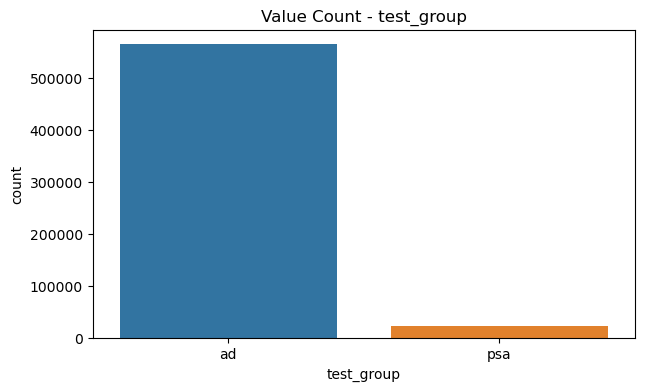

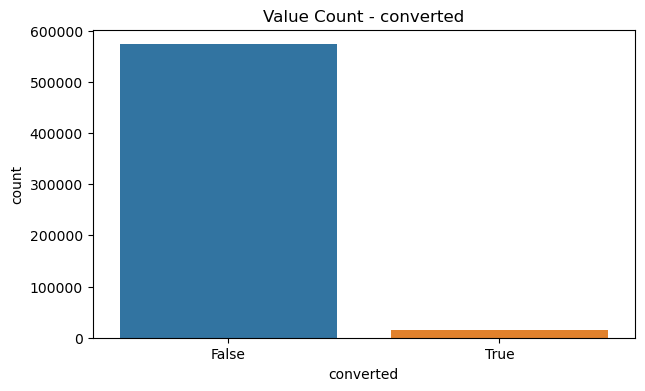

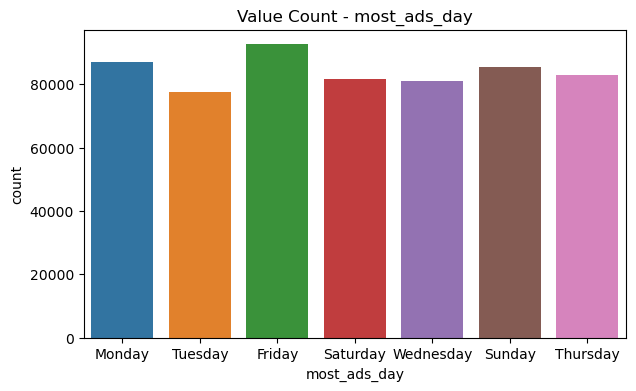

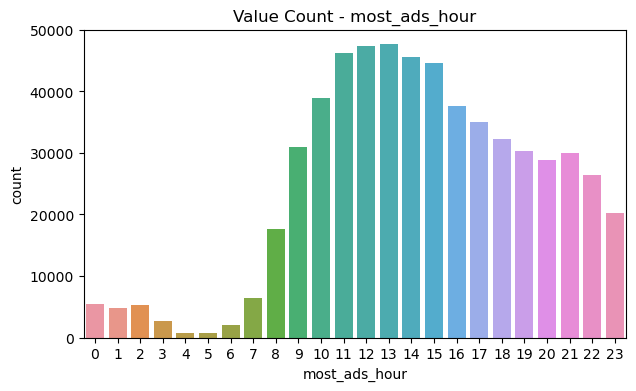

In [27]:
#create columns of interest
col_lst = df.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

peek hour: 10-16

In [28]:
grouped_counts = df.groupby("test_group")["converted"].value_counts()
grouped_counts

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64

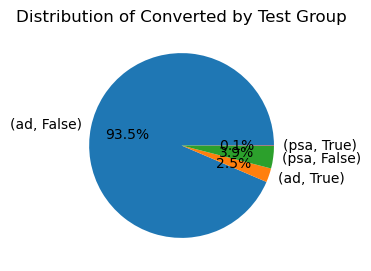

In [29]:
# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (3,3),autopct="%1.1f%%")

# Set the title and axis labels
plt.title("Distribution of Converted by Test Group")
plt.ylabel("")

# Show the plot
plt.show()

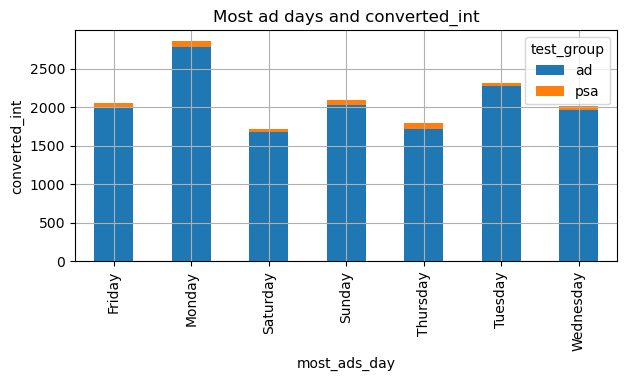

In [34]:
ax =df.groupby(by =["most_ads_day","test_group"]).sum()["converted_int"].\
    unstack("test_group").plot(kind="bar",figsize=(7,3),grid=True,stacked=True)
ax.set_ylabel("converted_int")
ax.set_title("Most ad days and converted_int")
plt.show()

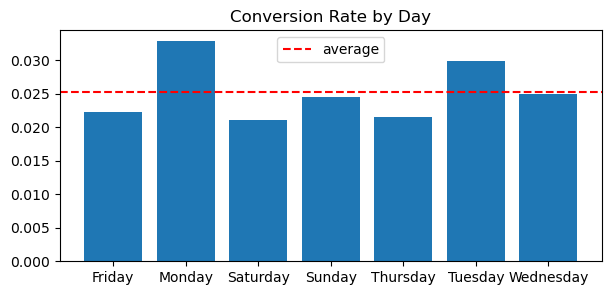

In [32]:
#visualize conversion by day
df_day_conv = pd.DataFrame(df.groupby("most_ads_day")["converted"].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(7,3))
plt.bar(data=df_day_conv, x="most_ads_day", height="converted")
plt.title("Conversion Rate by Day")
plt.axhline(df["converted"].mean(), color="r", linestyle="--", label="average")
plt.legend()
plt.show()

##### Ab testing

In [35]:
import math

def sample_size_calculator(population_size,confidence_level,margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p
    
    sample_size = ((z**2)*p*q*population_size)/((z**2*q)+((margin_of_error**2)*(population_size-1)))
    return math.ceil(sample_size)

In [36]:
#compute sample size 
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :588101 
The required sample size is: 1832


In [38]:
treatment = df.query("test_group == "ad"")
control = df.query("test_group == "psa"")
df.converted.mean() *100

2.523886203220195

In [39]:
control["converted"].mean()

0.01785410644448223

In [40]:
treatment["converted"].mean()

0.025546559636683747

mean of converted in treatment group is more than control group which make the hypothsis of ad has positive effect on conversion

(array([  1.,   3.,   2.,   2.,   0.,   4.,  11.,  20.,  24.,  39.,  53.,
         72.,  93., 144., 133., 181., 256., 311., 351., 388., 425., 518.,
        549., 619., 564., 582., 583., 545., 548., 501., 450., 422., 374.,
        262., 212., 193., 139., 137.,  80.,  67.,  39.,  36.,  25.,  14.,
          8.,   3.,   6.,   6.,   3.,   2.]),
 array([0.02443422, 0.02446589, 0.02449756, 0.02452923, 0.0245609 ,
        0.02459257, 0.02462424, 0.02465591, 0.02468758, 0.02471925,
        0.02475092, 0.02478259, 0.02481426, 0.02484593, 0.0248776 ,
        0.02490927, 0.02494094, 0.02497261, 0.02500428, 0.02503595,
        0.02506762, 0.02509929, 0.02513096, 0.02516263, 0.0251943 ,
        0.02522597, 0.02525764, 0.02528931, 0.02532097, 0.02535264,
        0.02538431, 0.02541598, 0.02544765, 0.02547932, 0.02551099,
        0.02554266, 0.02557433, 0.025606  , 0.02563767, 0.02566934,
        0.02570101, 0.02573268, 0.02576435, 0.02579602, 0.02582769,
        0.02585936, 0.02589103, 0.0259227 , 0.

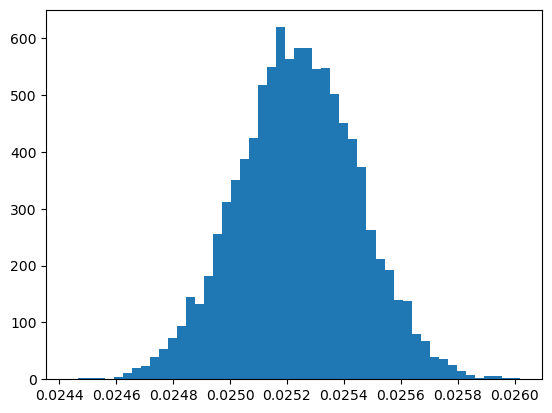

In [41]:
ad_converted = np.random.binomial(len(treatment),df.converted.mean(),10000)/len(treatment)
plt.hist(ad_converted, bins=50)

(array([  2.,   0.,   1.,   3.,   9.,   8.,   7.,  30.,  25.,  46.,  60.,
         58., 105., 105., 139., 211., 220., 361., 276., 355., 501., 402.,
        635., 504., 540., 631., 488., 628., 436., 431., 509., 375., 426.,
        268., 232., 260., 164., 170.,  81.,  74.,  77.,  33.,  40.,  27.,
         21.,   9.,   9.,   4.,   2.,   2.]),
 array([0.02150995, 0.02165448, 0.02179901, 0.02194355, 0.02208808,
        0.02223261, 0.02237715, 0.02252168, 0.02266621, 0.02281075,
        0.02295528, 0.02309981, 0.02324435, 0.02338888, 0.02353341,
        0.02367795, 0.02382248, 0.02396701, 0.02411155, 0.02425608,
        0.02440061, 0.02454515, 0.02468968, 0.02483421, 0.02497875,
        0.02512328, 0.02526781, 0.02541234, 0.02555688, 0.02570141,
        0.02584594, 0.02599048, 0.02613501, 0.02627954, 0.02642408,
        0.02656861, 0.02671314, 0.02685768, 0.02700221, 0.02714674,
        0.02729128, 0.02743581, 0.02758034, 0.02772488, 0.02786941,
        0.02801394, 0.02815848, 0.02830301, 0.

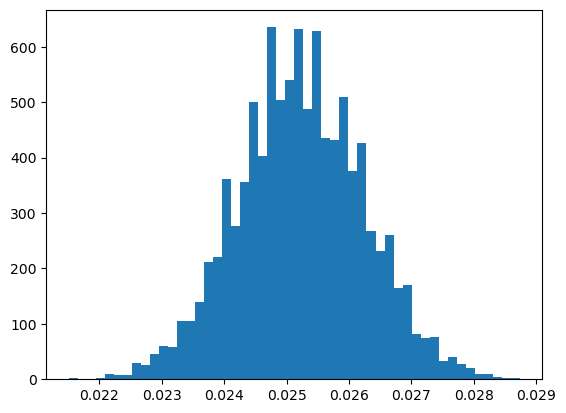

In [42]:
psa_converted = np.random.binomial(len(control),df.converted.mean(),10000)/len(control)
plt.hist(psa_converted, bins=50 ,align = "mid" , data=None)

In [43]:
p_diffs = ad_converted - psa_converted
p_diffs
p_diffs.mean()

1.3942252378780095e-05

In [44]:
#real diff
# customer who is shown ads bought less
ab_data_diff = treatment["converted"].mean() - control["converted"].mean()
ab_data_diff


0.007692453192201517

Does showing ads to people lead to more purchases? Is this statistically significant or not? 

H0: Showing ads has no significant effect on the number of purchases. 

H1: Showing ads has a significant effect on the number of purchases.

In [45]:
# is buying less is 
if ab_data_diff > 0 : 
    p_value = (p_diffs > ab_data_diff).mean() * 100
else :
    p_value = (p_diffs <= ab_data_diff).mean() * 100
print ( "p_value = " ,p_value)
if p_value < 0.05:
    print( "Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print( "Fail to reject the null hypothesis. There is no significant difference between the two groups.")

p_value =  0.0
Reject the null hypothesis. There is a significant difference between the two groups.


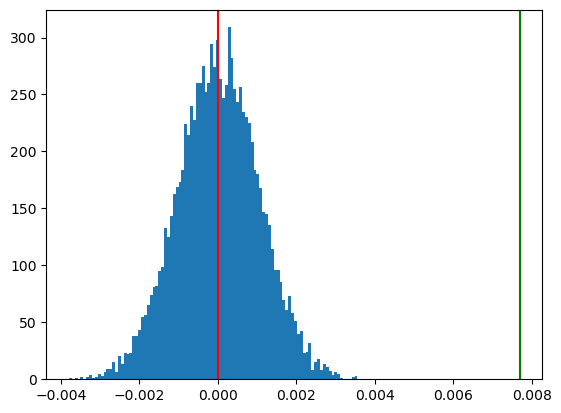

In [46]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color="g")
plt.axvline(x=higth, color="r")